# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')
library('ggrepel')
library('gridExtra')
library('RColorBrewer')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
childcare = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-09/childcare_costs.csv')
childcare |> head()
counties = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-09/counties.csv')
counties |> head()

Rows: 34567 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (61): county_fips_code, study_year, unr_16, funr_16, munr_16, unr_20to64...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,⋯,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,⋯,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,⋯,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,⋯,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,⋯,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,⋯,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
1001,2013,9.39,10.31,8.56,7.3,7.6,7.0,70.7,67.5,⋯,24.48,4.36,93.43,102.82,105.78,105.78,94.27,103.16,103.16,102.82


Rows: 3144 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): county_name, state_name, state_abbreviation
dbl (1): county_fips_code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


county_fips_code,county_name,state_name,state_abbreviation
<dbl>,<chr>,<chr>,<chr>
1001,Autauga County,Alabama,AL
1003,Baldwin County,Alabama,AL
1005,Barbour County,Alabama,AL
1007,Bibb County,Alabama,AL
1009,Blount County,Alabama,AL
1011,Bullock County,Alabama,AL


In [3]:
# dplyr functionality
childcare = childcare |>
   full_join(counties) |>
   as_tibble() |>
   print()

Joining with `by = join_by(county_fips_code)`


# A tibble: 34,567 × 64
   county_fips_code study_year unr_16 funr_16 munr_16 unr_20to64 funr_20to64
              <dbl>      <dbl>  <dbl>   <dbl>   <dbl>      <dbl>       <dbl>
 1             1001       2008   5.42    4.41    6.32        4.6         3.5
 2             1001       2009   5.93    5.72    6.11        4.8         4.6
 3             1001       2010   6.21    5.57    6.78        5.1         4.6
 4             1001       2011   7.55    8.13    7.03        6.2         6.3
 5             1001       2012   8.6     8.88    8.29        6.7         6.4
 6             1001       2013   9.39   10.3     8.56        7.3         7.6
 7             1001       2014   8.5     9.18    7.95        6.8         6.8
 8             1001       2015   7.64    8.45    6.91        5.9         6.1
 9             1001       2016   5.59    6.27    4.99        4.4         4.6
10             1001       2017   5.21    5.84    4.64        4.6         4.9
# ℹ 34,557 more rows
# ℹ 57 more variables: munr_20t

In [4]:
childcare2 = childcare |>
    filter(study_year == 2018, state_abbreviation == 'NC') |>
    group_by(county_fips_code) |>
    select(county_fips_code, households, county_name, state_abbreviation) |>
    summarize(mean_households = mean(households)) |>
    mutate(outlier = ifelse(mean_households > 200000, 'yes', 'no'))
childcare2

outlier_vector = childcare2 |>
    filter(outlier == 'yes')
outlier_vector

county_fips_code,mean_households,outlier
<dbl>,<dbl>,<chr>
37001,64059,no
37003,13722,no
37005,4746,no
37007,9516,no
37009,11805,no
37011,6587,no
37013,19325,no
37015,7976,no
37017,13968,no


county_fips_code,mean_households,outlier
<dbl>,<dbl>,<chr>
37081,202731,yes
37119,403546,yes
37183,390498,yes


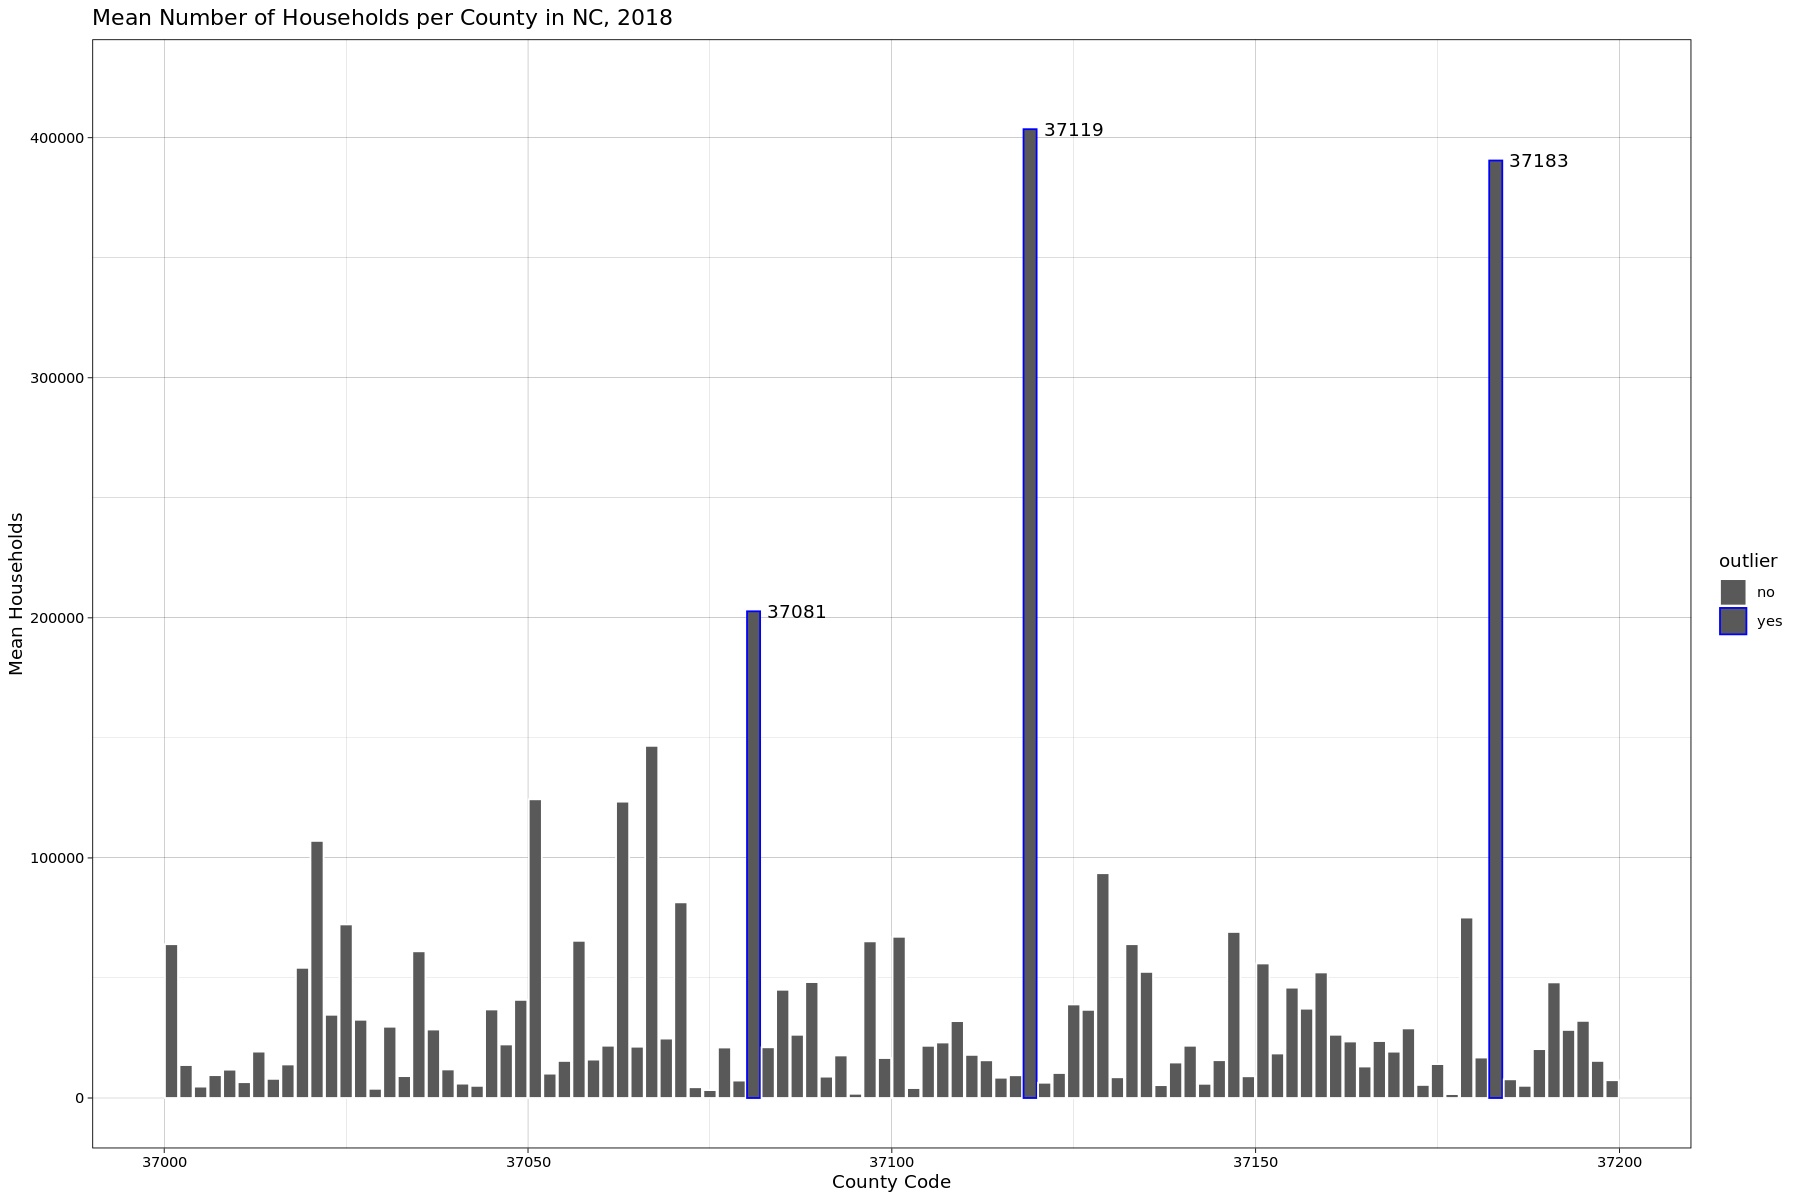

In [5]:
options(repr.plot.height = 10, repr.plot.width = 15, scipen = 6)
p1 = ggplot(childcare2, aes(x = county_fips_code, y = mean_households, color = outlier)) + geom_col() + 
    labs(title = 'Mean Number of Households per County in NC, 2018', x = 'County Code', y = 'Mean Households') +
    scale_color_manual(values=c('white', 'blue')) + 
    geom_text_repel(data = outlier_vector, 
                        nudge_x = 6,
                        direction = 'y',
                        aes(label = county_fips_code), 
                        color = 'black') + 
    ylim(0, 420000) + 
    theme(axis.text.y = element_text(angle = 45)) + 
    theme_linedraw()
p1

### The outlier counties with the most households reporting to the database are (left to right) Guilford, Mecklenburg, and Wake Counties.

In [6]:
childcare3 = childcare |>
    filter(study_year == 2018, state_abbreviation == 'NC') |>
    group_by(state_name) |>
    summarize(median_memp_m = median(memp_m), median_femp_m = median(femp_m), 
              median_memp_service = median(memp_service), median_femp_service = median(femp_service),
              median_memp_sales = median(memp_sales), median_femp_sales = median(femp_sales),
              median_memp_n = median(memp_n), median_femp_n = median(femp_n),
              median_memp_p = median(memp_p), median_femp_p = median(femp_p))
childcare3

state_name,median_memp_m,median_femp_m,median_memp_service,median_femp_service,median_memp_sales,median_femp_sales,median_memp_n,median_femp_n,median_memp_p,median_femp_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
North Carolina,23.45,37.23,15.055,22.36,13,28.4,21.395,1.02,24.59,9.22


In [7]:
childcare3 = childcare3 |>
    as_tibble() |>
    pivot_longer(cols = c(starts_with('median')), names_to = 'median') |>
    print()

# A tibble: 10 × 3
   state_name     median              value
   <chr>          <chr>               <dbl>
 1 North Carolina median_memp_m       23.4 
 2 North Carolina median_femp_m       37.2 
 3 North Carolina median_memp_service 15.1 
 4 North Carolina median_femp_service 22.4 
 5 North Carolina median_memp_sales   13   
 6 North Carolina median_femp_sales   28.4 
 7 North Carolina median_memp_n       21.4 
 8 North Carolina median_femp_n        1.02
 9 North Carolina median_memp_p       24.6 
10 North Carolina median_femp_p        9.22


In [8]:
childcare3$median = childcare3$median |>
    factor(childcare3$median, levels = childcare3$median)
childcare3$median

[1] median_memp_m       median_femp_m       median_memp_service
 [4] median_femp_service median_memp_sales   median_femp_sales  
 [7] median_memp_n       median_femp_n       median_memp_p      
[10] median_femp_p      
10 Levels: median_memp_m median_femp_m ... median_femp_p

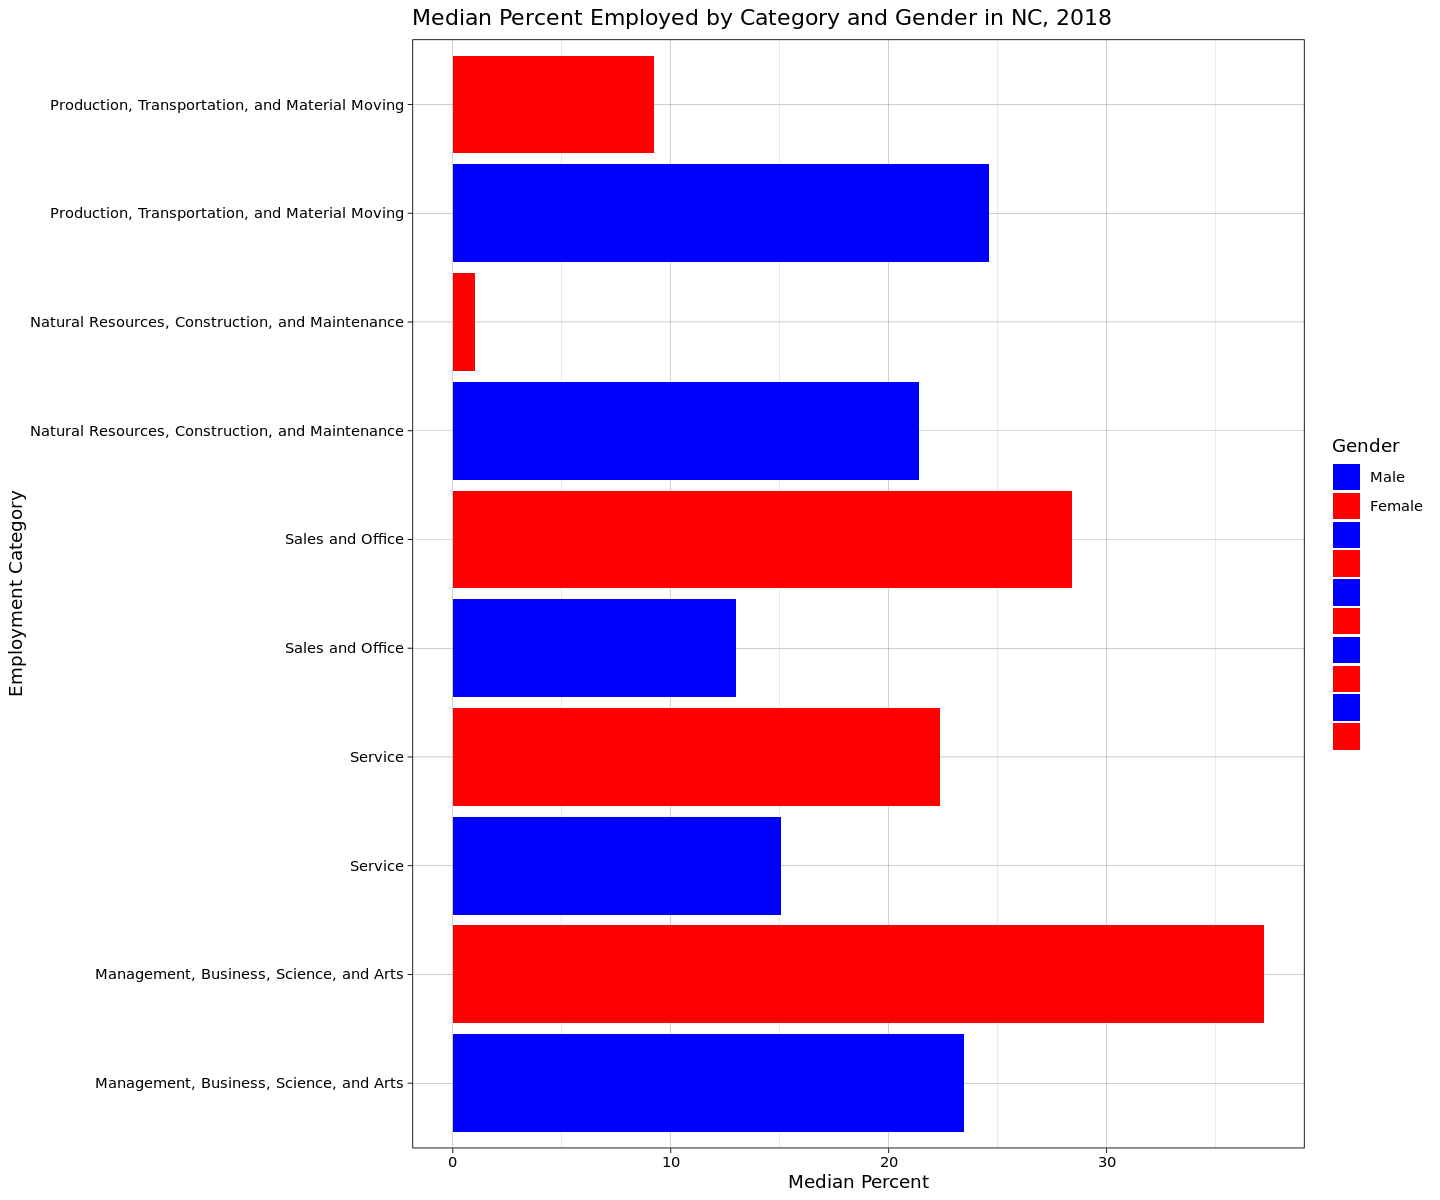

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)
p2 = ggplot(childcare3, aes(x = median, y = value, fill = median)) + geom_bar(stat = 'identity') + coord_flip() + 
    labs(title = 'Median Percent Employed by Category and Gender in NC, 2018', 
            x = 'Employment Category', y = 'Median Percent', fill = 'Gender') + 
    scale_fill_manual(values = c('blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red'), labels = c('Male', 'Female', '', '', '', '','', '', '', '')) + 
    scale_x_discrete(limits = childcare3$median, labels = c('Management, Business, Science, and Arts', 'Management, Business, Science, and Arts',
                                                            'Service', 'Service',
                                                            'Sales and Office', 'Sales and Office',
                                                            'Natural Resources, Construction, and Maintenance', 'Natural Resources, Construction, and Maintenance',
                                                            'Production, Transportation, and Material Moving', 'Production, Transportation, and Material Moving')) + 
    theme_linedraw()
p2

In [10]:
childcare4 = childcare |>
    filter(state_abbreviation == c('NC', 'MS', 'TX', 'FL', 'CA', 'UT', 'ND', 'IL'), !is.na(mc_preschool), !is.na(mhi_2018)) |>
    group_by(study_year, state_name) |>
    select(mhi_2018, mc_preschool, state_name, state_abbreviation, study_year) |>
    summarize(median_hi = median(mhi_2018), median_preschool = median(mc_preschool))
childcare4

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `==...`.
Caused by warning in `state_abbreviation == c("NC", "MS", "TX", "FL", "CA", "UT", "ND", "IL")`:
! longer object length is not a multiple of shorter object length”
`summarise()` has grouped output by 'study_year'. You can override using the
`.groups` argument.


study_year,state_name,median_hi,median_preschool
<dbl>,<chr>,<dbl>,<dbl>
2008,California,57831.20,156.870
2008,Florida,42887.01,92.420
2008,Illinois,54516.90,105.000
2008,North Dakota,45600.64,103.305
2008,Utah,63706.55,103.145
2009,California,67095.99,194.400
2009,Florida,54188.55,102.610
2009,Illinois,53984.97,107.500
2009,North Dakota,52965.90,115.140


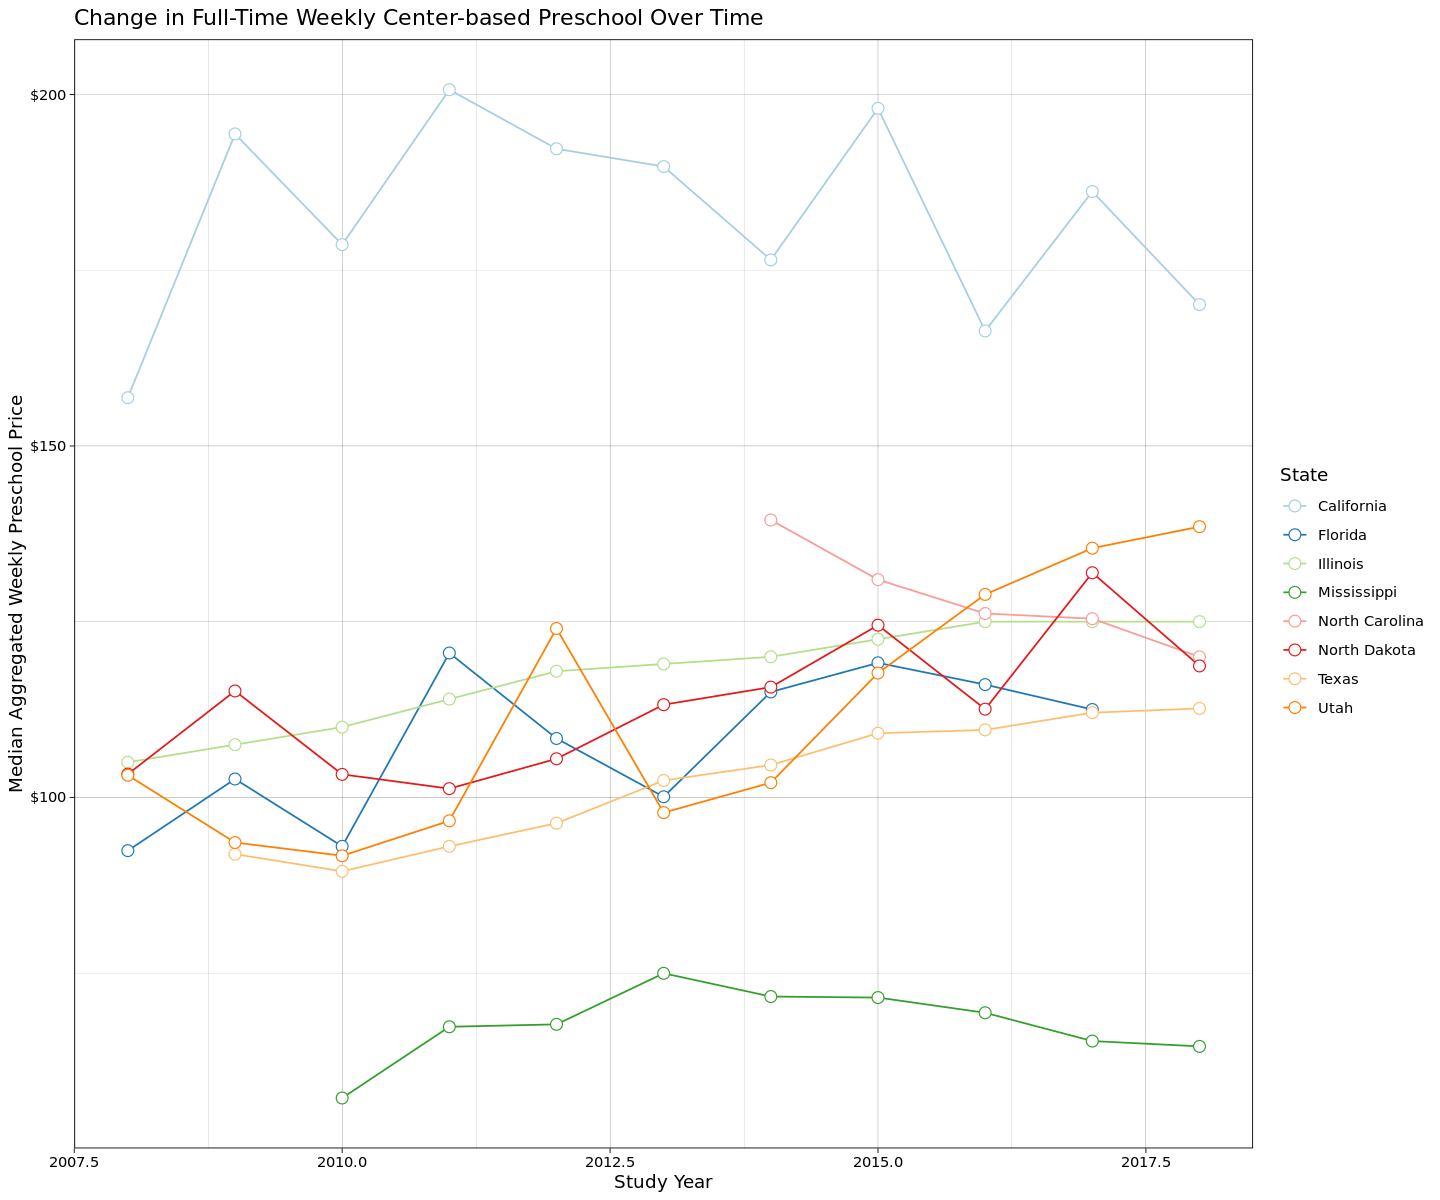

In [11]:
p3 = ggplot(childcare4, aes(x = study_year, y = median_preschool, color = state_name)) + geom_line() + 
    geom_point(shape = 21, fill = 'white', size = 3) + 
    labs(title = 'Change in Full-Time Weekly Center-based Preschool Over Time', x = 'Study Year', y = 'Median Aggregated Weekly Preschool Price', color = 'State') + 
    scale_y_continuous(labels = scales::dollar_format()) + 
    scale_color_brewer(palette = 'Paired') +
    theme_linedraw()
p3

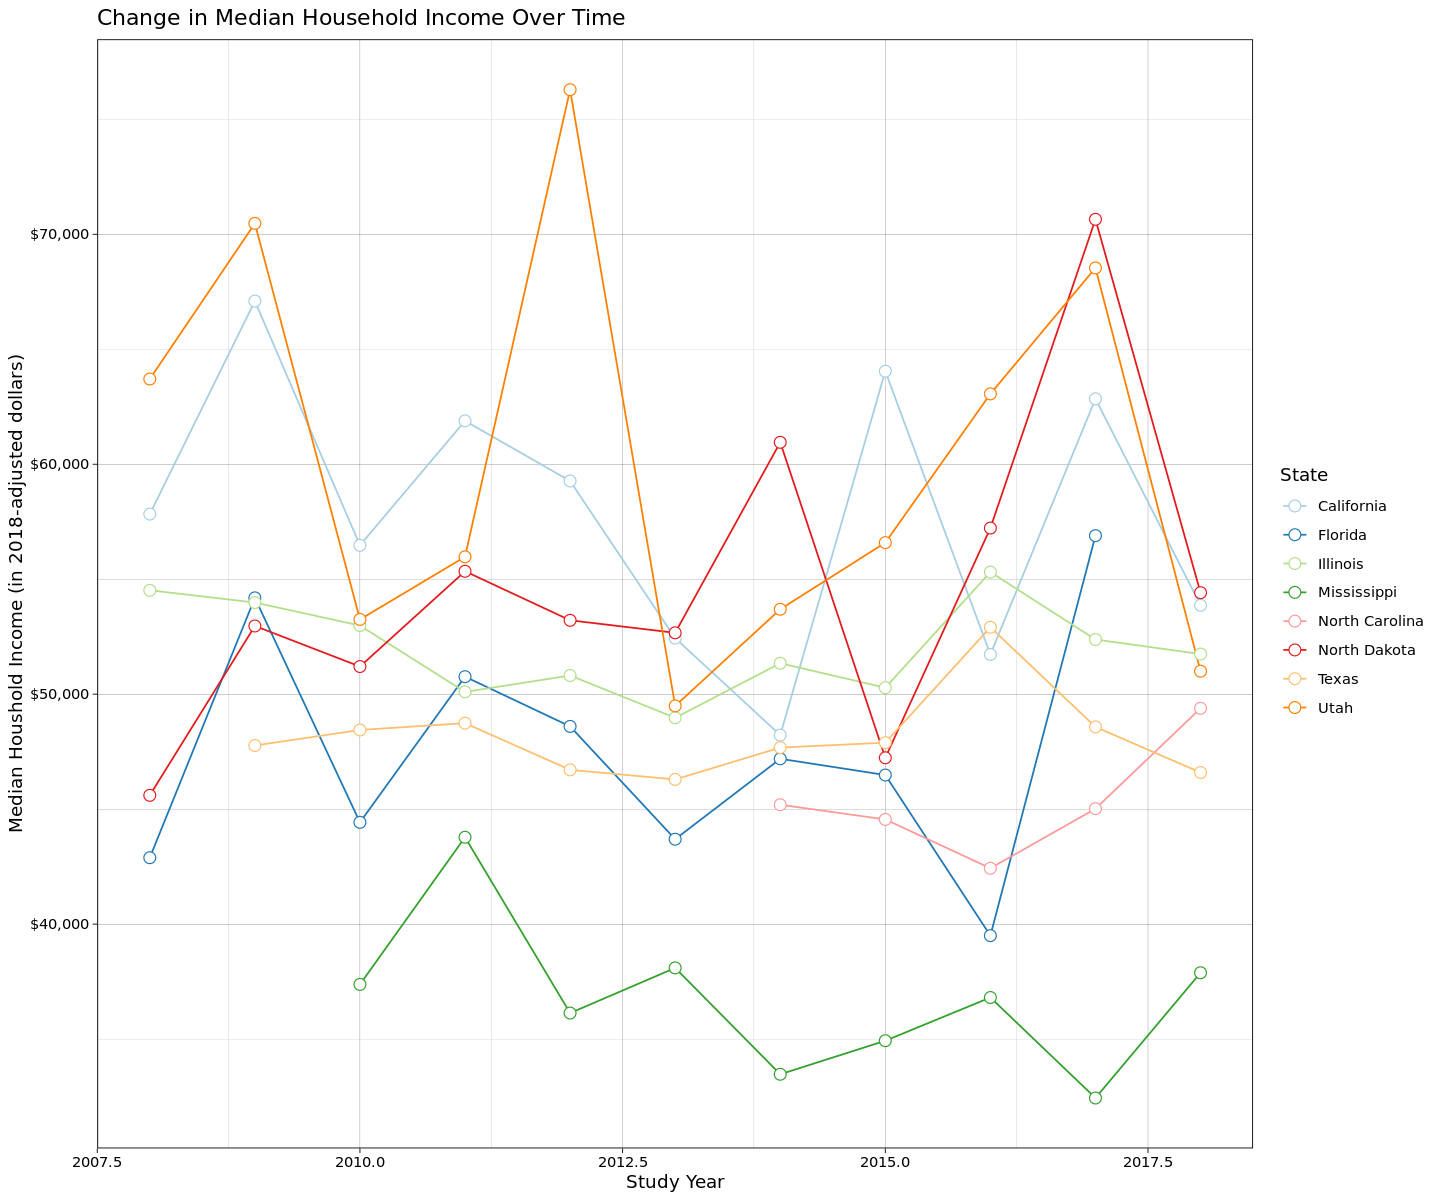

In [12]:
p4 = ggplot(childcare4, aes(x = study_year, y = median_hi, color = state_name)) + geom_line() + 
    geom_point(shape = 21, fill = 'white', size = 3) + 
    labs(title = 'Change in Median Household Income Over Time', x = 'Study Year', y = 'Median Houshold Income (in 2018-adjusted dollars)', color = 'State') + 
    scale_y_continuous(labels = scales::dollar_format()) + 
    scale_color_brewer(palette = 'Paired') +
    theme_linedraw()
p4

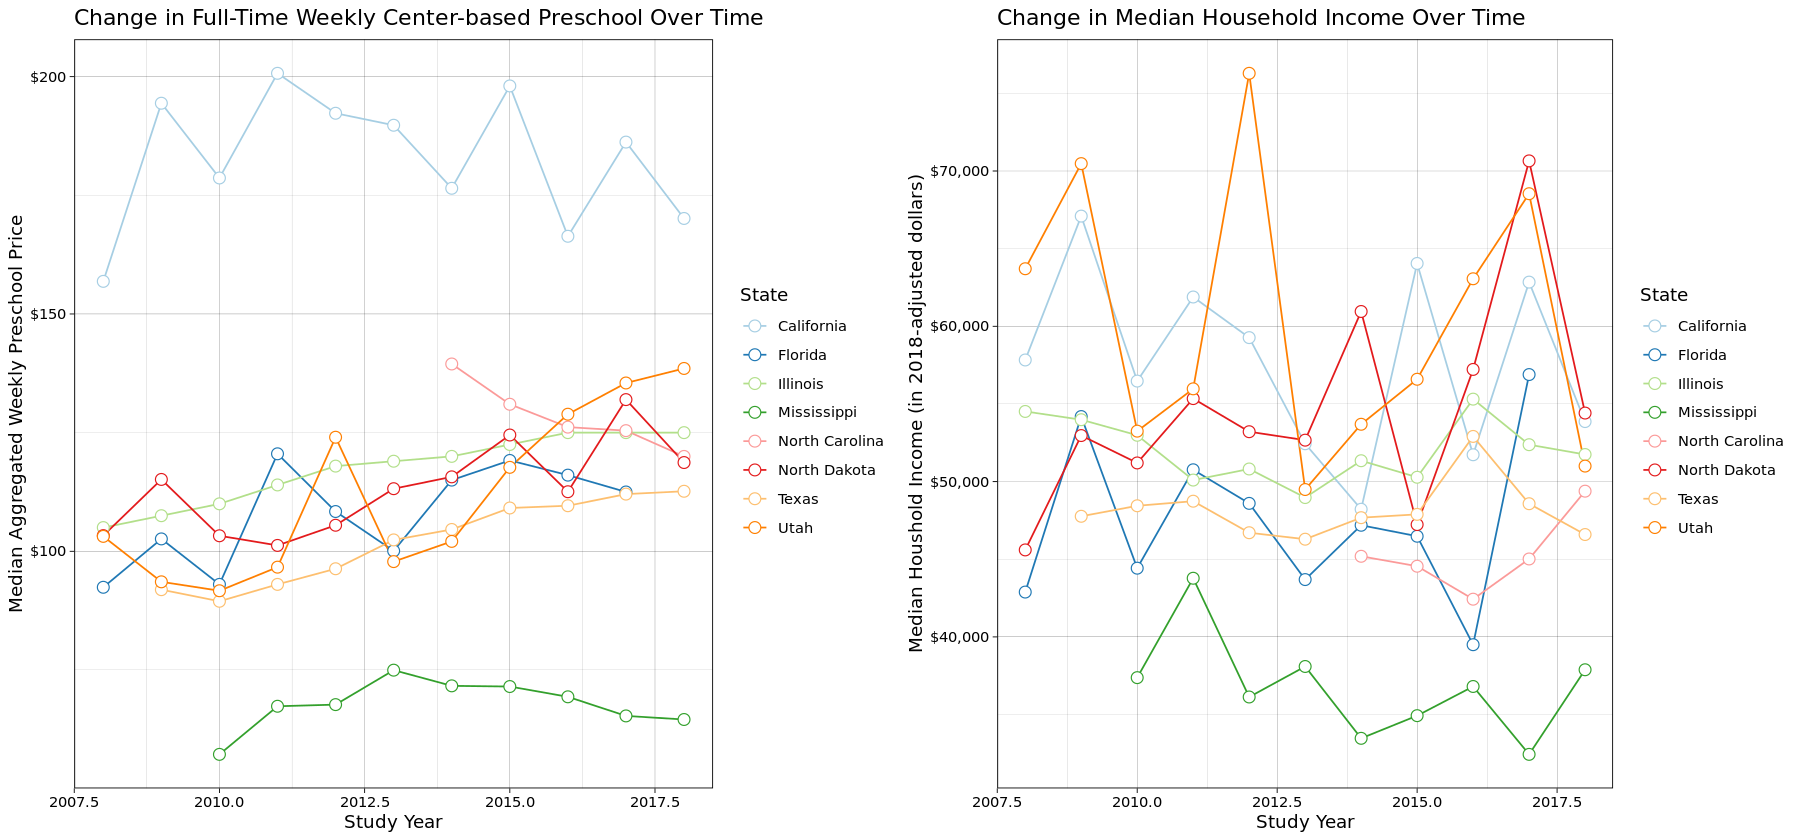

In [13]:
options(repr.plot.width = 15, repr.plot.height = 7)
grid.arrange(p3, p4, ncol = 2)

#### My data is from the National Database of Childcare Prices, found on the TidyTuesday GitHub repository. It consists of childcare price data by provider type and age of children from 2008 to 2018, with a separate file for the county codes used in the childcare data set. After loading the data sets, I used a full join by county_fips_code to insert the county information into the childcare dataset. Firstly, I wanted to get an idea of the number of households responding to this survey. I filtered the data to a more manageable level, restricting to 2018 North Carolina data. I then created a mean_households object holding the mean number of households for each county using dplyr functions. After plotting, I wanted to highlight the outlier counties by creating a data frame with the outlier counties and plotting them with geom_text_repel. 

#### Looking at the data dictionary, I thought it would be interesting to see the gender breakdown in the different employment categories found in the data set, which include all people aged 16 and older and were already segregated by gender:
####    - management, business, science, and arts occupations
####    - service occupations
####    - sales and office occupations
####    - natural resources, construction, and maintenance occupations
####    - production, transportation, and material moving occupations 
    
#### Again restricting to 2018 NC data, I used `summarize` to calculate the median percentage of men and women in each occupation for the state. I then used `pivot_longer` to move each median calculation into a column of medians to plot. I had to set the levels for the median column in order to preserve the order of the medians and have the male and female calculations next to each other for the same employment category. Since this data set does not have a gender encoding, I had to color each column according to gender manually. 
#### For my last graph, I wanted to show some sort of comparison of income and chilcare costs over time. I decided to plot the change over time across states from different regions across the country. I chose Mississippi, Texas, Florida, California, Utah, North Dakota, and Illinois. After trying to plot both houshold income and preschool costs with a connected scatterplot that didn't turn out very clear, I plotted each separately and then used `grid.arrange` from the `gridExtra` package to place them side-by-side after formatting.